The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Found 1659 files
First file: /Users/alforest/Desktop/Documents/SomeSeeds/F7_free/F7_ramp.001


Reading COMs:   0%|                                    | 0/1659 [00:00<?, ?it/s]/Users/alforest/opt/anaconda3/lib/python3.9/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: HA
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/Users/alforest/opt/anaconda3/lib/python3.9/site-packages/MDAnalysis/topology/TXYZParser.py:139: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "
Reading COMs: 100%|█████████████████████████| 1659/1659 [08:13<00:00,  3.36it/s]


COM trajectory shape: (1659, 600, 3)


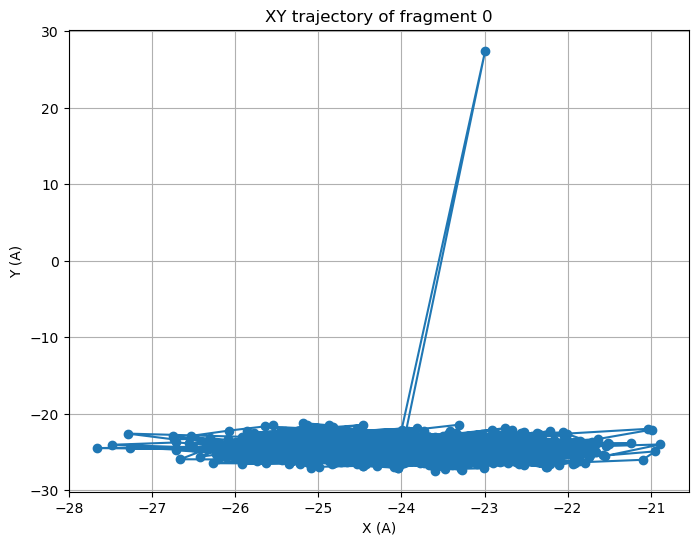

In [15]:
%load_ext autoreload
%autoreload 2

import ar5
from ar5.file_utils import find_xyz_files
from ar5.analysis import traj_com
import numpy as np

data_dir = "/Users/alforest/Desktop/Documents/SomeSeeds/F7_free/"
prefix = "F7_ramp"

filepaths = find_xyz_files(data_dir, prefix=prefix, type="numbered")

print(f"Found {len(filepaths)} files")
if len(filepaths) > 0:
    print("First file:", filepaths[0])

com_traj = traj_com(filepaths)

print(f"COM trajectory shape: {com_traj.shape}")

import matplotlib.pyplot as plt

frag_idx = 0
xy = com_traj[:, frag_idx, :2]

plt.figure(figsize=(8,6))
plt.plot(xy[:,0], xy[:,1], marker='o')
plt.xlabel("X (A)")
plt.ylabel("Y (A)")
plt.title(f"XY trajectory of fragment {frag_idx}")
plt.grid(True)
plt.show()


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Using frame: /Users/alforest/Desktop/Documents/SomeSeeds/F7_free/F7_ramp.1377


/Users/alforest/opt/anaconda3/lib/python3.9/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: HA
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/Users/alforest/opt/anaconda3/lib/python3.9/site-packages/MDAnalysis/topology/TXYZParser.py:139: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


Found 600 fragments
Average |psi6| = 0.779
0.7783156830716766


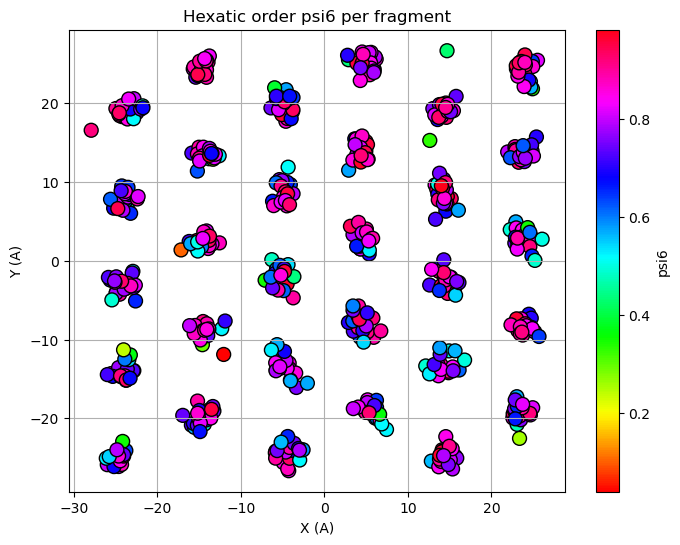

In [1]:

%load_ext autoreload
%autoreload 2


import ar5
from ar5.file_utils import find_xyz_files
from ar5.analysis import traj_com, compute_fragment_directors, get_fragment_neighbors, compute_hexatic_order_parameter

import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt


data_dir = "/Users/alforest/Desktop/Documents/SomeSeeds/F7_free/"
prefix = "F7_ramp"

filepaths = find_xyz_files(data_dir, prefix=prefix, type="numbered")

frame_path = filepaths[514]
print(f"Using frame: {frame_path}")

u = mda.Universe(frame_path, format="TXYZ")

coms = np.array([frag.center_of_mass() for frag in u.atoms.fragments])
directors = compute_fragment_directors(u)
box = u.dimensions[:3]

print(f"Found {len(coms)} fragments")

psi6_array = []
mag_array = []
angle_array = []

for i in range(len(coms)):
    neighbors, Rij_unit = get_fragment_neighbors(coms, directors, box, i)
    psi6, mag_psi6, angle_psi6 = compute_hexatic_order_parameter(Rij_unit)

    psi6_array.append(psi6)
    mag_array.append(mag_psi6)
    angle_array.append(angle_psi6)

psi6_array = np.array(psi6_array)
mag_array = np.array(mag_array)
angle_array = np.array(angle_array)

print(f"Average |psi6| = {mag_array.mean():.3f}")

neighbors, Rij_unit = get_fragment_neighbors(coms, directors, box, 50)
psi6, mag_psi6, angle_psi6 = compute_hexatic_order_parameter(Rij_unit)

print(mag_psi6)

xy_coms = coms[:, :2]

plt.figure(figsize=(8,6))
sc = plt.scatter(xy_coms[:,0], xy_coms[:,1], c=mag_array, cmap='hsv', s=100, edgecolor='black')
plt.colorbar(sc, label="psi6")
plt.xlabel("X (A)")
plt.ylabel("Y (A)")
plt.title("Hexatic order psi6 per fragment")
plt.grid(True)
plt.show()


In [2]:
psi6_array

array([-0.92088155+9.59908160e-02j, -0.76493738-4.51366981e-02j,
       -0.83288841+3.08036965e-01j, -0.7715983 +2.05430109e-01j,
       -0.71792588-2.68752813e-02j, -0.62004701-1.39337207e-01j,
       -0.73439675-3.19759573e-01j, -0.32548407-1.28206155e-01j,
       -0.84678871-2.27696227e-01j, -0.67633038-7.04407847e-02j,
       -0.73902947+1.22581178e-02j, -0.68146794+1.38786595e-02j,
       -0.46755656+2.39998810e-01j, -0.84230703+2.05136469e-02j,
       -0.97507566-1.04787209e-01j, -0.92217665-2.07862049e-01j,
       -0.69446046-2.61263543e-01j, -0.83407457-2.07979502e-01j,
       -0.52526126+1.54115585e-01j, -0.74932899+2.57679074e-01j,
       -0.81797924+3.15657843e-01j, -0.85638472+1.67388137e-01j,
       -0.76519176+1.23904235e-01j, -0.68030904-8.56069495e-03j,
       -0.65119896+2.60375363e-01j, -0.77315219+1.20768121e-01j,
       -0.81990167+2.27275989e-01j, -0.85531069-4.39404013e-02j,
       -0.72765292-1.69563702e-02j, -0.65934243+3.39857781e-01j,
       -0.5405425 -2.8954

Using frame: /Users/alforest/Desktop/Documents/SomeSeeds/F7_free2/F7_ramp.515
Found 600 fragments
Average |psi6| = 0.759
0.926273968034068


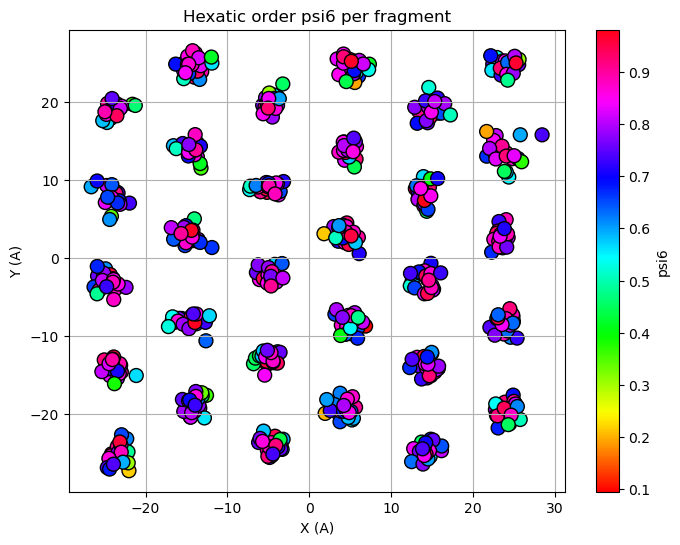

In [25]:
from ar5.file_utils import convert_dync_atom_labels

data_dir = "/Users/alforest/Desktop/Documents/SomeSeeds/F7_free2/"
prefix = "F7_ramp"


filepaths = find_xyz_files(data_dir, prefix=prefix, type="numbered")

#convert_dync_atom_labels(["/Users/alforest/Desktop/Documents/SomeSeeds/F7_free2/"])

frame_path = filepaths[514]
print(f"Using frame: {frame_path}")

u = mda.Universe(frame_path, format="TXYZ")

coms = np.array([frag.center_of_mass() for frag in u.atoms.fragments])
directors = compute_fragment_directors(u)
box = u.dimensions[:3]

print(f"Found {len(coms)} fragments")

psi6_array = []
mag_array = []
angle_array = []

for i in range(len(coms)):
    neighbors, Rij_unit = get_fragment_neighbors(coms, directors, box, i)
    psi6, mag_psi6, angle_psi6 = compute_hexatic_order_parameter(Rij_unit)

    psi6_array.append(psi6)
    mag_array.append(mag_psi6)
    angle_array.append(angle_psi6)

psi6_array = np.array(psi6_array)
mag_array = np.array(mag_array)
angle_array = np.array(angle_array)

print(f"Average |psi6| = {mag_array.mean():.3f}")

neighbors, Rij_unit = get_fragment_neighbors(coms, directors, box, 50)
psi6, mag_psi6, angle_psi6 = compute_hexatic_order_parameter(Rij_unit)

print(mag_psi6)

xy_coms = coms[:, :2]

plt.figure(figsize=(8,6))
sc = plt.scatter(xy_coms[:,0], xy_coms[:,1], c=mag_array, cmap='hsv', s=100, edgecolor='black')
plt.colorbar(sc, label="psi6")
plt.xlabel("X (A)")
plt.ylabel("Y (A)")
plt.title("Hexatic order psi6 per fragment")
plt.grid(True)
plt.show()


In [15]:
mag_array

array([0.85067598, 0.82062454, 0.87430634, 0.72078391, 0.72168915,
       0.58688556, 0.76952297, 0.24566135, 0.92656472, 0.64687842,
       0.81523065, 0.62962411, 0.62427639, 0.81732517, 0.95967764,
       0.95632067, 0.81003257, 0.80258492, 0.47124519, 0.70250075,
       0.88159199, 0.90040044, 0.80365121, 0.65435854, 0.63743999,
       0.76354601, 0.76002983, 0.90702747, 0.80014523, 0.63773693,
       0.600829  , 0.60598934, 0.61336642, 0.55414924, 0.16182463,
       0.87448294, 0.84612953, 0.94297375, 0.92315627, 0.82173932,
       0.71430042, 0.61973903, 0.60773025, 0.59777924, 0.68466147,
       0.59831622, 0.8165598 , 0.92622972, 0.6426348 , 0.91267754,
       0.75355209, 0.88953322, 0.7436591 , 0.46572331, 0.80375086,
       0.77507083, 0.91424511, 0.8679095 , 0.87656055, 0.66548943,
       0.36631732, 0.63489482, 0.85140456, 0.91602421, 0.76966416,
       0.84497447, 0.69954599, 0.55397904, 0.82174665, 0.67430341,
       0.70751675, 0.68263119, 0.7816816 , 0.95148796, 0.52472

Average real psi6 = 0.543
Min real psi6 = -0.130
Max real psi6 = 0.981


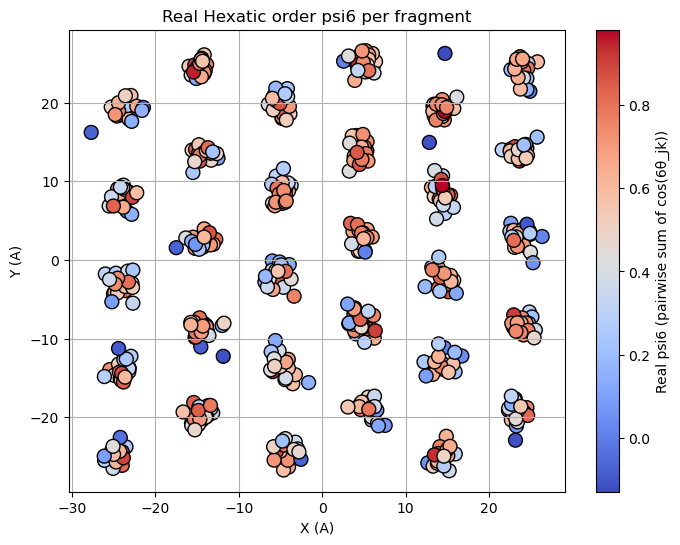

In [21]:
from ar5.analysis import compute_real_hexatic_order

real_psi6_array = []

for i in range(len(coms)):
    neighbors, Rij_unit = get_fragment_neighbors(coms, directors, box, i)
    real_psi6 = compute_real_hexatic_order(Rij_unit)
    real_psi6_array.append(real_psi6)

real_psi6_array = np.array(real_psi6_array)

print(f"Average real psi6 = {real_psi6_array.mean():.3f}")
print(f"Min real psi6 = {real_psi6_array.min():.3f}")
print(f"Max real psi6 = {real_psi6_array.max():.3f}")

xy_coms = coms[:, :2]

plt.figure(figsize=(8,6))
sc = plt.scatter(xy_coms[:,0], xy_coms[:,1], c=real_psi6_array, cmap='coolwarm', s=100, edgecolor='black')
plt.colorbar(sc, label="Real psi6 (pairwise sum of cos(6θ_jk))")
plt.xlabel("X (A)")
plt.ylabel("Y (A)")
plt.title("Real Hexatic order psi6 per fragment")
plt.grid(True)
plt.show()

In [19]:
real_psi6_array

array([ 0.67808337,  0.62411112,  0.72890144,  0.46087923,  0.45335482,
        0.25031356,  0.54977525, -0.03279011,  0.82154045,  0.30574661,
        0.53383496,  0.35764674,  0.30147648,  0.62665442,  0.90836785,
        0.9024126 ,  0.60753675,  0.59410076,  0.09339954,  0.43765236,
        0.74251945,  0.72116407,  0.53028334,  0.39551559,  0.33605827,
        0.46306389,  0.51117317,  0.79592862,  0.56933615,  0.32239967,
        0.26615631,  0.26627963,  0.28427621,  0.24623298, -0.0883555 ,
        0.71229194,  0.66501707,  0.88337965,  0.84190289,  0.59948342,
        0.44442665,  0.30744249,  0.27778872,  0.27875138,  0.3754235 ,
        0.24068168,  0.62688543,  0.81868401,  0.33566408,  0.81649917,
        0.51858317,  0.74973171,  0.46855074,  0.08827689,  0.5915471 ,
        0.53419014,  0.80885817,  0.74186431,  0.73897046,  0.36567724,
        0.01876639,  0.32462215,  0.71291983,  0.78110264,  0.56206144,
        0.66017119,  0.40191777,  0.20074867,  0.62873208,  0.37